In [2]:
import pandas as pd
from surprise import Dataset, Reader
from surprise.prediction_algorithms.matrix_factorization import SVDpp

import os

DATA_DIR = "data"
train_data = pd.read_csv(os.path.join(DATA_DIR, "train.csv"))
X = pd.read_csv(os.path.join(DATA_DIR, "test.csv"))

reader = Reader(rating_scale=(0, 10))
data = Dataset.load_from_df(train_data, reader)
full_train_data = data.build_full_trainset()

In [3]:
from cv_logs import ParameterSearch

import numpy as np
from surprise.prediction_algorithms.matrix_factorization import SVDpp
from surprise.model_selection import RandomizedSearchCV

ITERATIONS = 1000
FOLD = 3

param_grid = {
    "n_factors": np.arange(3, 250, 2),
    "cache_ratings": ["True"],
    "n_epochs": np.arange(100, 1901, 200),
    "lr_all": 10 ** (np.arange(-5, 0, 0.4)),
    "reg_all": 10 ** (np.arange(-5, 0, 0.4)),
    "reg_bu": [0],
    "reg_bi": [0],
}
rs = RandomizedSearchCV(
    SVDpp,
    param_grid,
    measures=["rmse"],
    n_iter=ITERATIONS,
    cv=FOLD,
    n_jobs=-1,
    joblib_verbose=5,
)
rs.fit(data)
ps = ParameterSearch(rs.cv_results)
ps.write("SVDpp-search1.csv")
print(rs.best_score["rmse"])
print(rs.best_params["rmse"])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed: 32.4min
[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed: 46.2min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 58.5min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed: 73.7min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed: 90.4min
[Parallel(n_jobs=-1)]: Done 2154 tasks      | elapsed: 108.0min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 128.9min


0.7234212606911751
{'n_factors': 137, 'cache_ratings': 'True', 'n_epochs': 1500, 'lr_all': 0.0063095734448019684, 'reg_all': 0.10000000000000082, 'reg_bu': 0, 'reg_bi': 0}


[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed: 152.7min finished


In [8]:
from surprise.model_selection import GridSearchCV
from cv_logs import ParameterSearch

import numpy as np
from surprise.prediction_algorithms.matrix_factorization import SVDpp
from surprise.model_selection import RandomizedSearchCV

ITERATIONS = 1000
FOLD = 5

param_grid = {
    "n_factors": np.arange(3, 250, 2),
    "cache_ratings": ["True"],
    "n_epochs": [200],
    "lr_all": 10 ** (np.arange(-5, 0, 0.4)),
    "reg_all": 10 ** (np.arange(-5, 0, 0.4)),
    "reg_bu": [0],
    "reg_bi": [0],
}
rs = RandomizedSearchCV(
    SVDpp,
    param_grid,
    measures=["rmse"],
    cv=FOLD,
    n_jobs=-1,
    joblib_verbose=5,
    n_iter=ITERATIONS,
)
rs.fit(data)
ps = ParameterSearch(rs.cv_results)
ps.write("SVDpp-cv5.csv")
print(rs.best_score["rmse"])
print(rs.best_params["rmse"])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed: 28.2min
[Parallel(n_jobs=-1)]: Done 2154 tasks      | elapsed: 34.7min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 41.2min
[Parallel(n_jobs=-1)]: Done 3018 tasks      | elapsed: 48.3min
[Parallel(n_jobs=-1)]: Done 3504 tasks      | elapsed: 56.5min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 65.0min
[Parallel(n_jobs=-1)]: Done 4584 tasks      | e

0.6880488952884425
{'n_factors': 29, 'cache_ratings': 'True', 'n_epochs': 200, 'lr_all': 0.01584893192461124, 'reg_all': 0.10000000000000082, 'reg_bu': 0, 'reg_bi': 0}


[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed: 80.9min finished


In [5]:
# SVDpp attempt 1
from predict import predict
from cv_logs import save_model

svdpp_1 = SVDpp(
    **{
        "n_factors": 137,
        "cache_ratings": "True",
        "n_epochs": 1500,
        "lr_all": 0.0063095734448019684,
        "reg_all": 0.10000000000000082,
        "reg_bu": 0,
        "reg_bi": 0,
    }
).fit(full_train_data)

# Public score: 0.66389
predict(svdpp_1, "svdpp_1.csv")
save_model(svdpp_1, "svdpp_1")

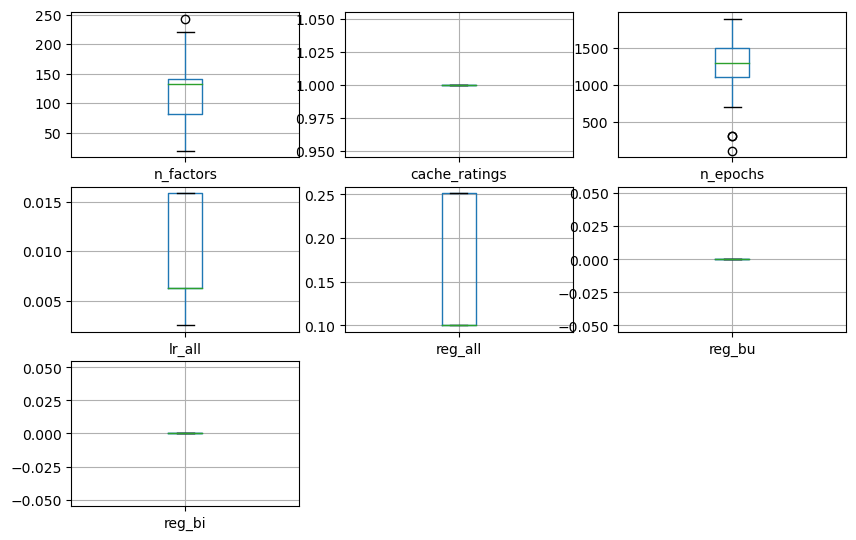

/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:1863: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastruc

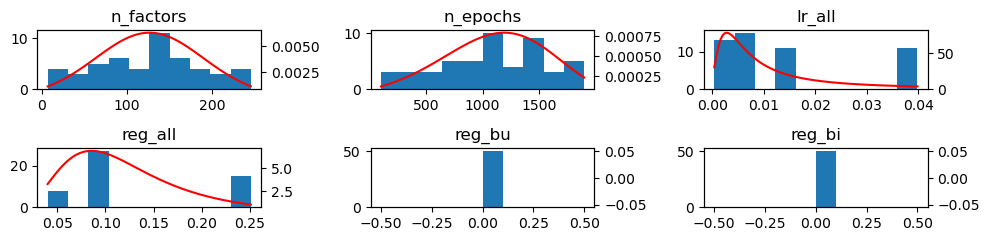

In [1]:
from cv_logs import ParameterSearch

import matplotlib.pyplot as plt

ps = ParameterSearch("cv/SVDpp-search1.csv")
ps.plot_params(25)
plt.show()
best_distributions = ps.get_best_distribution(50)

In [9]:
# 2nd search
from rv import PositiveInt_rv

from surprise.model_selection import RandomizedSearchCV
from surprise.prediction_algorithms.matrix_factorization import SVDpp
import scipy.stats as st

ITERATIONS = 1000
FOLD = 3

int_dist = ["n_factors", "n_epochs"]


dist = ["lr_all", "reg_all"]
param_grid = {
    param: getattr(st, best_distributions[param][0])(*best_distributions[param][2])
    for param in dist
}

INT_MIN = 5
param_grid |= {
    param: PositiveInt_rv(
        getattr(st, best_distributions[param][0])(*best_distributions[param][2]),
        INT_MIN,
    )
    for param in int_dist
}
param_grid |= {
    "cache_ratings": ["True"],
    "reg_bu": [0],
    "reg_bi": [0],
}

rs2 = RandomizedSearchCV(
    SVDpp,
    param_grid,
    measures=["rmse"],
    n_iter=ITERATIONS,
    cv=FOLD,
    n_jobs=-1,
    joblib_verbose=5,
)
rs2.fit(data)
ps2 = ParameterSearch(rs2.cv_results)
ps2.write("SVDpp-search2.csv")
print(rs2.best_score["rmse"])
print(rs2.best_params["rmse"])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 24.9min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed: 37.2min
[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed: 50.1min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 63.6min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed: 81.2min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed: 101.1min
[Parallel(n_jobs=-1)]: Done 2154 tasks      | elapsed: 120.9min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 143.4min


0.7163836758856537
{'cache_ratings': 'True', 'lr_all': 0.0034327987866452922, 'n_epochs': 1756, 'n_factors': 52, 'reg_all': 0.14471911603328835, 'reg_bi': 0, 'reg_bu': 0}


[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed: 168.7min finished


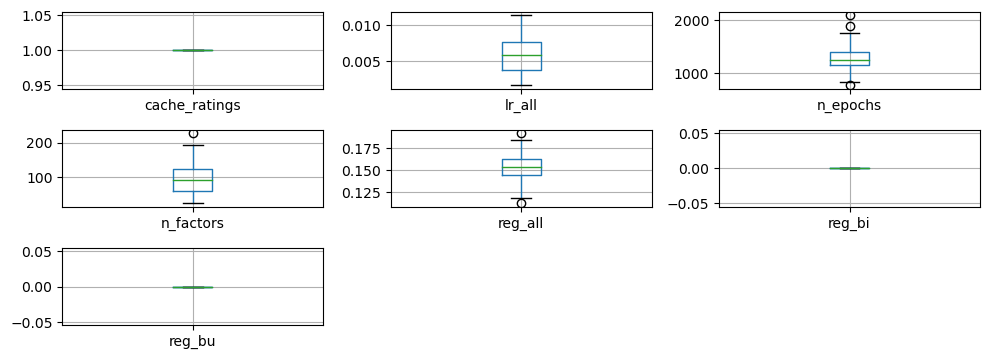

/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:1863: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastruc

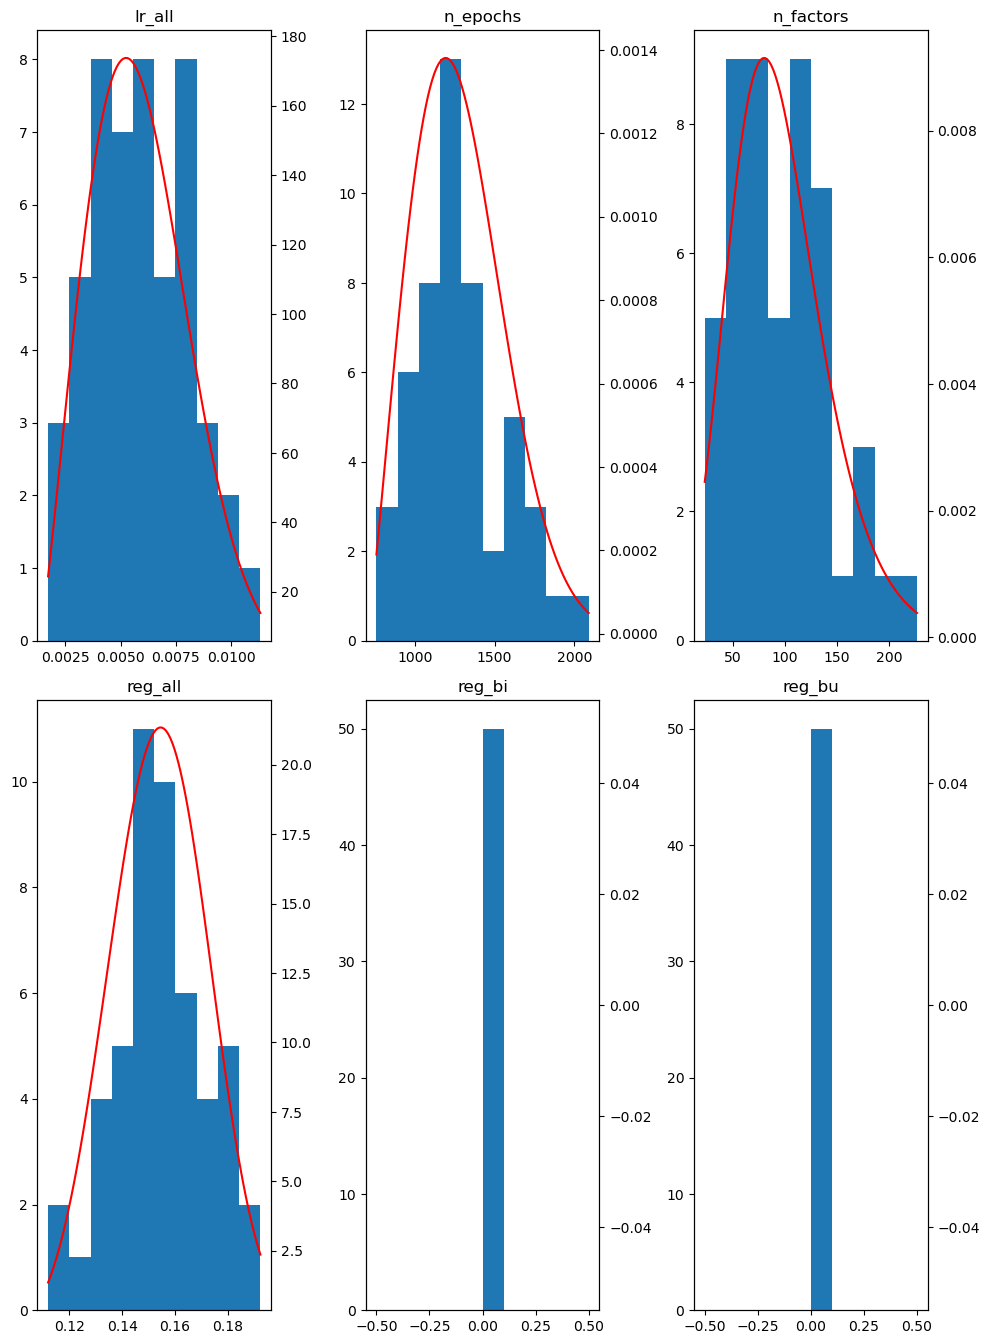

In [5]:
from cv_logs import ParameterSearch
import matplotlib.pyplot as plt

ps2 = ParameterSearch("cv/SVDpp-search2.csv")
ps2.plot_params(50)
plt.show()
best_distributions = ps2.get_best_distribution(50)

In [8]:
# SVDpp attempt 2
from predict import predict
from cv_logs import save_model
from surprise.prediction_algorithms.matrix_factorization import SVDpp

svdpp_2 = SVDpp(
    **{
        "cache_ratings": "True",
        "lr_all": 0.0034327987866452922,
        "n_epochs": 1756,
        "n_factors": 52,
        "reg_all": 0.14471911603328835,
        "reg_bi": 0,
        "reg_bu": 0,
    }
).fit(full_train_data)

# Public score: 0.66538
predict(svdpp_2, "svdpp_2.csv")
save_model(svdpp_2, "svdpp_2")

In [10]:
import numpy as np
from evolution import Evolution

param_grid = {
    "n_factors": np.arange(5, 500, 25),
    "cache_ratings": [True],
    "n_epochs": [200],
    "lr_all": 10 ** (np.arange(-6, 0, 0.4)),
    "reg_all": 10 ** (np.arange(-6, 0, 0.4)),
    "reg_bu": [0],
    "reg_bi": [0],
}
const_params = {
    "cache_ratings": [True],
    "n_epochs": [200],
    "reg_bu": [0],
    "reg_bi": [0],
}
int_params = ["n_factors"]

evo = Evolution(
    SVDpp,
    param_grid,
    int_dist=int_params,
    const_params=const_params,
)
# Public score: 0.67044
evo.evolve(data, 1, 0.3, 1000, 3)
# Public score: 0.66976
evo.evolve(data, 1, 0.2, 750, 4)
# Public score: 0.66459
evo.evolve(data, 1, 0.15, 400, 5)

RUNNING EVOLUTION 0


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed: 26.5min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 2154 tasks      | elapsed: 39.8min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 47.4min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed: 54.6min finished


RUNNING EVOLUTION 1


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:1863: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:2321: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  s = stats.skew(data)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs

RUNNING EVOLUTION 2


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:1863: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:2321: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  s = stats.skew(data)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs

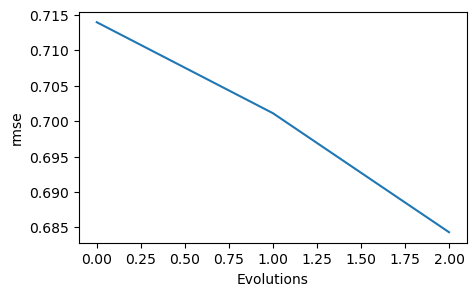

In [26]:
evo.plot_errors()

In [25]:
# Train on more epochs based on best evo model
from surprise.model_selection import GridSearchCV

best_params = evo.evolution_results[-1].search.best_params["rmse"]
evo_model_params = {}
for key, value in best_params.items():
    evo_model_params[key] = [value]

evo_model_params["n_epochs"] = np.arange(50, 2000, 150)
evo_gs = GridSearchCV(
    SVDpp, evo_model_params, measures=["rmse"], cv=3, joblib_verbose=5, n_jobs=-1
)
evo_gs.fit(data)

# best :200 -> epochs not much effect
print(evo_gs.best_score["rmse"])
print(evo_gs.best_params["rmse"])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  39 | elapsed:   18.2s remaining:   11.4s
[Parallel(n_jobs=-1)]: Done  32 out of  39 | elapsed:   31.3s remaining:    6.9s


0.7199539524346106
{'cache_ratings': True, 'lr_all': 0.012162150524090976, 'n_epochs': 200, 'n_factors': 36, 'reg_all': 0.13283825665712357, 'reg_bi': 0, 'reg_bu': 0}


[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:   39.3s finished


In [34]:
param_grid = {
    "n_factors": np.arange(5, 500, 25),
    "cache_ratings": [True],
    "n_epochs": [200],
    "lr_all": 10 ** (np.arange(-6, 0, 0.4)),
    "reg_all": 10 ** (np.arange(-6, 0, 0.4)),
    "reg_bu": [0],
    "reg_bi": [0],
}
const_params = {
    "cache_ratings": [True],
    "n_epochs": [200],
    "reg_bu": [0],
    "reg_bi": [0],
}
int_params = ["n_factors"]

evo2 = Evolution(
    SVDpp,
    param_grid,
    int_dist=int_params,
    const_params=const_params,
)
# 0.66898
# 0.6712
# 0.66494
# 0.67176
# 0.67312
evo2.evolve(data, 5, 0.2, 1000, 3)

RUNNING EVOLUTION 0


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done 2154 tasks      | elapsed: 44.0min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 51.9min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed: 60.4min finished


RUNNING EVOLUTION 1


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:1863: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:2321: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  s = stats.skew(data)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs

RUNNING EVOLUTION 2


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:1863: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:2321: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  s = stats.skew(data)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs

RUNNING EVOLUTION 3


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:1863: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:2321: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  s = stats.skew(data)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs

RUNNING EVOLUTION 4


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:1863: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:2321: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  s = stats.skew(data)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs

In [35]:
# Public score: 0.66713
evo2.evolve(data, 1, 0.3, 1000, 3)
# Public score: 0.66714
evo2.evolve(data, 1, 0.2, 750, 4)
# Public score: 0.66584
evo2.evolve(data, 1, 0.15, 400, 5)

RUNNING EVOLUTION 5


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:1863: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:2321: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  s = stats.skew(data)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs

RUNNING EVOLUTION 6


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:1863: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:2321: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  s = stats.skew(data)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs

RUNNING EVOLUTION 7


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:1863: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:2321: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  s = stats.skew(data)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs

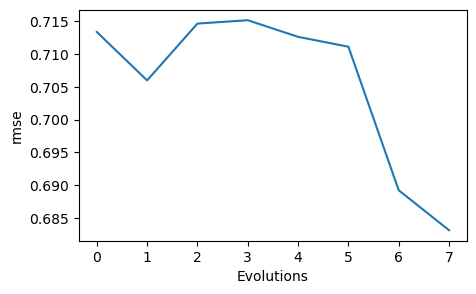

In [37]:
evo2.plot_errors()

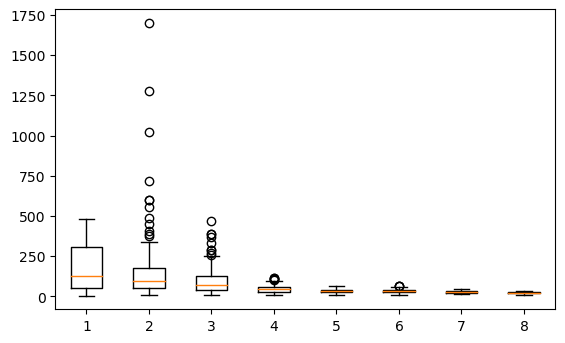

In [38]:
evo2.plot_param("n_factors")

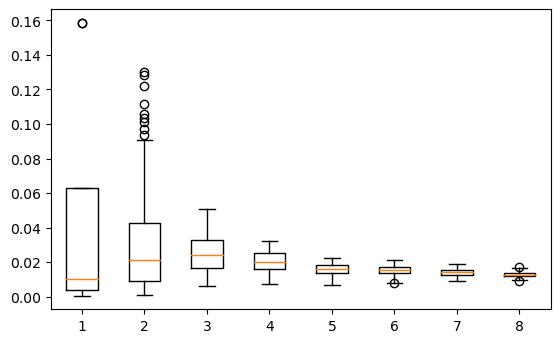

In [40]:
evo2.plot_param("lr_all")

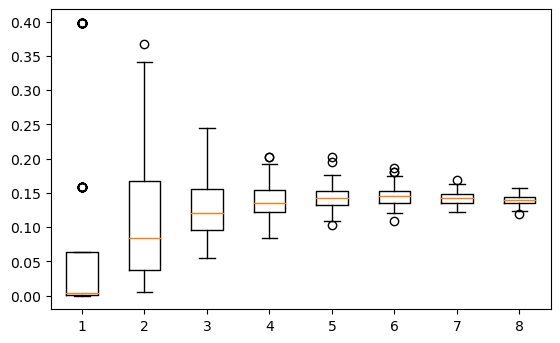

In [42]:
evo2.plot_param("reg_all")

In [48]:
# Elite evolution
# survival_rate = 0.01 i.e. Top 10
import numpy as np
from evolution import Evolution

param_grid = {
    "n_factors": np.arange(1, 250, 2),
    "cache_ratings": [True],
    "n_epochs": [50, 100, 200, 300],
    "lr_all": 10 ** (np.arange(-6, 0, 0.4)),
    "reg_all": 10 ** (np.arange(-6, 0, 0.4)),
    "reg_bu": [0],
    "reg_bi": [0],
}
const_params = {
    "cache_ratings": [True],
}
int_params = ["n_factors", "n_epochs"]

evo_elite = Evolution(
    SVDpp,
    param_grid,
    int_dist=int_params,
    const_params=const_params,
    model_suffix="_elite",
)
evo_elite.evolve(data, 3, 0.01, 1000, 3)

RUNNING EVOLUTION 0


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 2154 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 25.1min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed: 29.4min finished


RUNNING EVOLUTION 1


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:1863: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:2321: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  s = stats.skew(data)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs

RUNNING EVOLUTION 2


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:1863: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:2321: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  s = stats.skew(data)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs

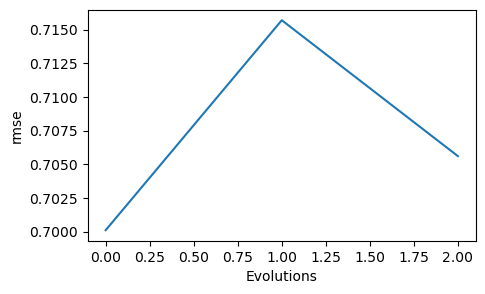

In [49]:
evo_elite.plot_errors()

In [8]:
# !!!
# Evolution on 4 folds
from evolution import Evolution

import numpy as np
from surprise import SVDpp

param_grid = {
    "n_factors": [1],
    "cache_ratings": [True],
    "n_epochs": [350],
    "lr_all": np.arange(0.001, 0.101, 0.001),
    "reg_all": np.arange(0.001, 0.991, 0.001),
    "reg_bu": [0],
    "reg_bi": [0],
}
const_params = {
    "cache_ratings": [True],
    "n_epochs": [350],
    "n_factors": [1],
    "reg_bu": [0],
    "reg_bi": [0],
}
int_params = []

evo_cv4 = Evolution(
    SVDpp,
    param_grid,
    int_dist=int_params,
    const_params=const_params,
    model_suffix="_cv4",
)

evo_cv4.evolve(data, 3, 0.1, 500, 4)

RUNNING EVOLUTION 0


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   50.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 24.1min finished


RUNNING EVOLUTION 1


/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2066: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2066: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:7422: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:7445: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | ela

RUNNING EVOLUTION 2


/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2066: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2066: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:7422: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:7445: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | ela

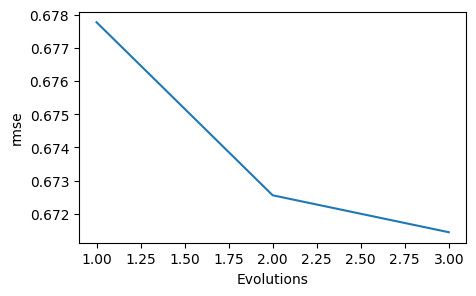

In [9]:
evo_cv4.plot_errors()

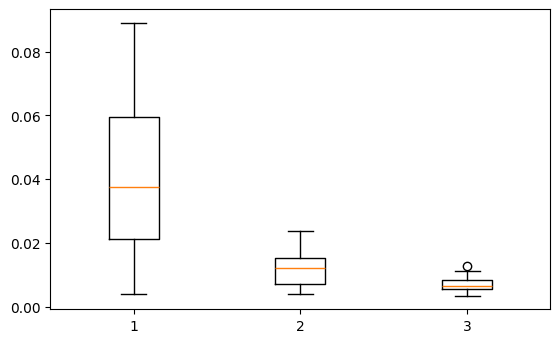

In [12]:
evo_cv4.plot_param("lr_all")

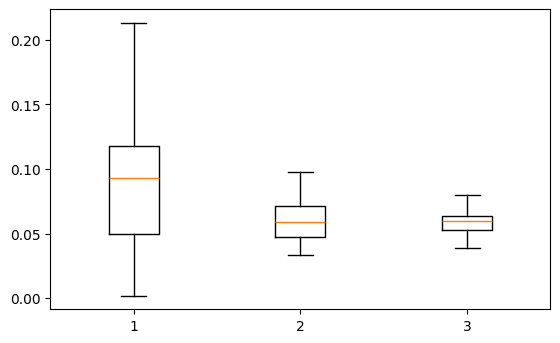

In [13]:
evo_cv4.plot_param("reg_all")

In [14]:
evo_cv4.evolve(data, 4, 0.1, 500, 4)

RUNNING EVOLUTION 3


/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2066: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2066: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:7422: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:7445: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | ela

RUNNING EVOLUTION 4


/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2066: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2066: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:7422: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:7445: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | ela

RUNNING EVOLUTION 5


/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2066: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2066: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:7422: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:7445: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | ela

RUNNING EVOLUTION 6


/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2066: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2066: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:7422: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/boris/anaconda3/envs/stat30092/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:7445: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | ela

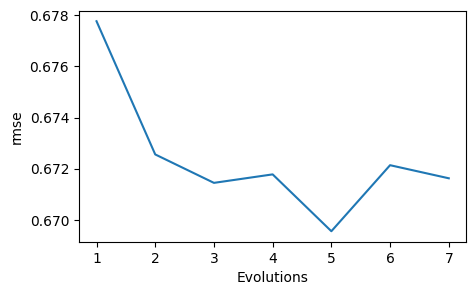

In [15]:
evo_cv4.plot_errors()

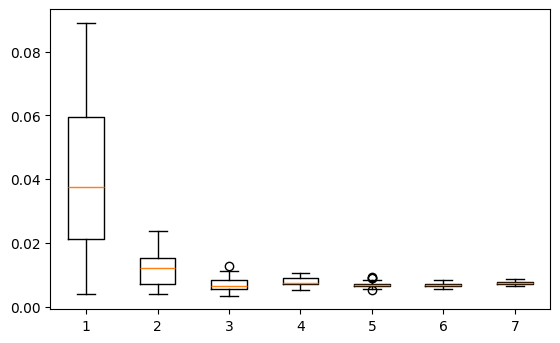

In [19]:
evo_cv4.plot_param("lr_all")

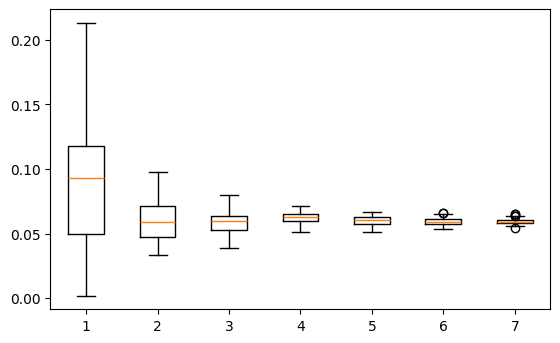

In [20]:
evo_cv4.plot_param("reg_all")

In [3]:
# Evolution on regs
# start with SVDpp-bcd8-cv4.csv
from evolution import Evolution

import numpy as np
from surprise import SVDpp

# lr_all = 0.00263
# reg_all = 0.00942
param_grid = {
    "n_factors": [1],
    "cache_ratings": [True],
    "n_epochs": [577],
    "lr_all": [0.00263],
    "reg_all": [0.00942],
    "reg_bu": np.arange(0, 0.05, 0.001),
    "reg_bi": np.arange(0, 0.05, 0.001),
    "lr_bu": np.arange(0, 0.05, 0.001),
    "lr_bi": np.arange(0, 0.05, 0.001),
}
const_params = {
    "cache_ratings": [True],
    "n_epochs": [577],
    "n_factors": [1],
    "lr_all": [0.00263],
    "reg_all": [0.00942],
}
int_params = []

evo_cv4 = Evolution(
    SVDpp,
    param_grid,
    int_dist=int_params,
    const_params=const_params,
    model_suffix="_(b)",
)

# evo2 public score: 0.6476 -> Best so far
evo_cv4.evolve(data, 6, 0.1, 500, 4)

RUNNING EVOLUTION 0
model_name='SVDpp_evo(1)_(b)'


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  4.9min finished


Train rmse: 0.6707959629214951
RUNNING EVOLUTION 1
model_name='SVDpp_evo(2)_(b)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.664379182932628
RUNNING EVOLUTION 2
model_name='SVDpp_evo(3)_(b)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6677106694759509
RUNNING EVOLUTION 3
model_name='SVDpp_evo(4)_(b)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6732380096624435
RUNNING EVOLUTION 4
model_name='SVDpp_evo(5)_(b)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6649114929690751
RUNNING EVOLUTION 5
model_name='SVDpp_evo(6)_(b)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6640811764860586


In [5]:
# evo6 public score: 0.64737 -> Better
evo_cv4.evolve(data, 4, 0.1, 500, 4)

RUNNING EVOLUTION 6
model_name='SVDpp_evo(7)_(b)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6678779356263373
RUNNING EVOLUTION 7
model_name='SVDpp_evo(8)_(b)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6691150901460046
RUNNING EVOLUTION 8
model_name='SVDpp_evo(9)_(b)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6663932624938642
RUNNING EVOLUTION 9
model_name='SVDpp_evo(10)_(b)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6659367085790748


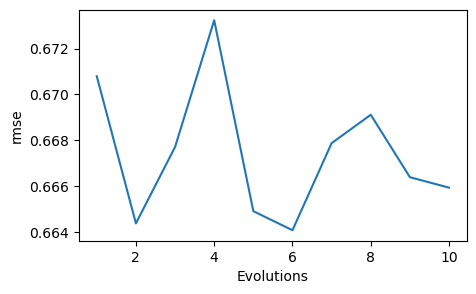

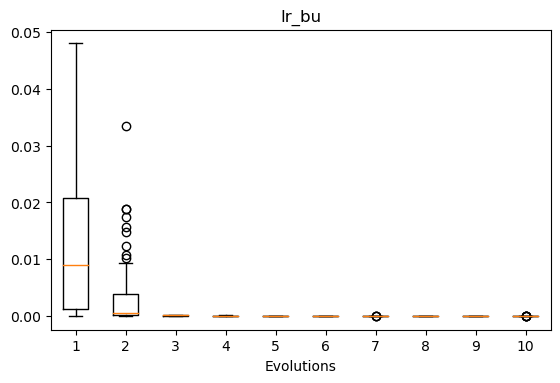

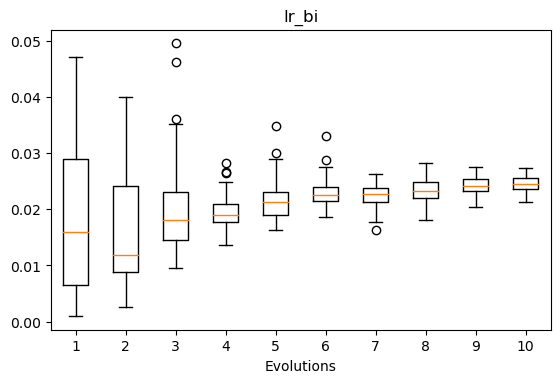

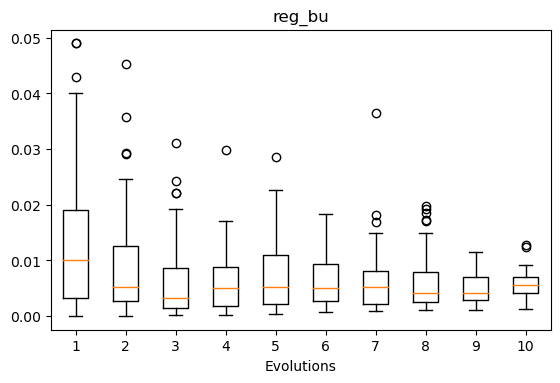

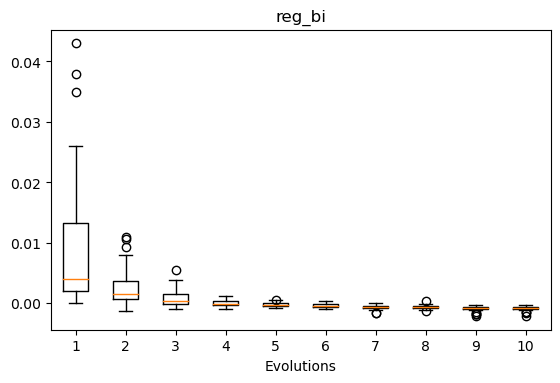

In [6]:
evo_cv4.plot_errors()
evo_cv4.plot_param("lr_bu")
evo_cv4.plot_param("lr_bi")
evo_cv4.plot_param("reg_bu")
evo_cv4.plot_param("reg_bi")

In [11]:
# Regularization on p, q
from evolution import Evolution

import numpy as np
from surprise import SVDpp

# lr_all = 0.00263
# reg_all = 0.00942
param_grid = {
    "n_factors": [1],
    "cache_ratings": [True],
    "n_epochs": [577],
    "lr_all": [0.00263],
    "reg_all": [0.00942],
    "reg_bu": [0.00599],
    "reg_bi": [-0.00036],
    "lr_bu": [0.00006],
    "lr_bi": [0.02749],
    "reg_pu": np.arange(0, 0.05, 0.001),
    "reg_qi": np.arange(0, 0.05, 0.001),
    "lr_pu": np.arange(0, 0.05, 0.001),
    "lr_qi": np.arange(0, 0.05, 0.001),
}
const_params = {
    "cache_ratings": [True],
    "n_epochs": [577],
    "n_factors": [1],
    "lr_all": [0.00263],
    "reg_all": [0.00942],
    "reg_bu": [0.00599],
    "reg_bi": [-0.00036],
    "lr_bu": [0.00006],
    "lr_bi": [0.02749],
}
int_params = []

evo_regpq = Evolution(
    SVDpp,
    param_grid,
    int_dist=int_params,
    const_params=const_params,
    model_suffix="_(pq)",
)

# evo4 public score: 0.6469
evo_regpq.evolve(data, 10, 0.1, 500, 4)

RUNNING EVOLUTION 0
model_name='SVDpp_evo(1)_(pq)'


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  4.9min finished


Train rmse: 0.6674513185297315
RUNNING EVOLUTION 1
model_name='SVDpp_evo(2)_(pq)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6626074124331889
RUNNING EVOLUTION 2
model_name='SVDpp_evo(3)_(pq)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6657773094568918
RUNNING EVOLUTION 3
model_name='SVDpp_evo(4)_(pq)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6623638129122738
RUNNING EVOLUTION 4
model_name='SVDpp_evo(5)_(pq)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6627833792546517
RUNNING EVOLUTION 5
model_name='SVDpp_evo(6)_(pq)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6680410168087818
RUNNING EVOLUTION 6
model_name='SVDpp_evo(7)_(pq)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6691562647906435
RUNNING EVOLUTION 7
model_name='SVDpp_evo(8)_(pq)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6712171091701041
RUNNING EVOLUTION 8
model_name='SVDpp_evo(9)_(pq)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.667360615374872
RUNNING EVOLUTION 9
model_name='SVDpp_evo(10)_(pq)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6662258524664431


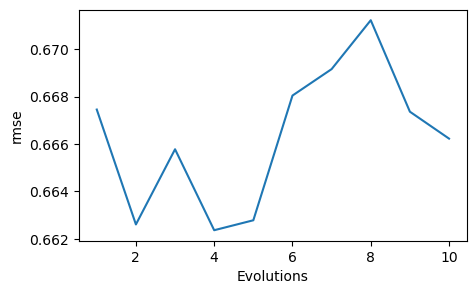

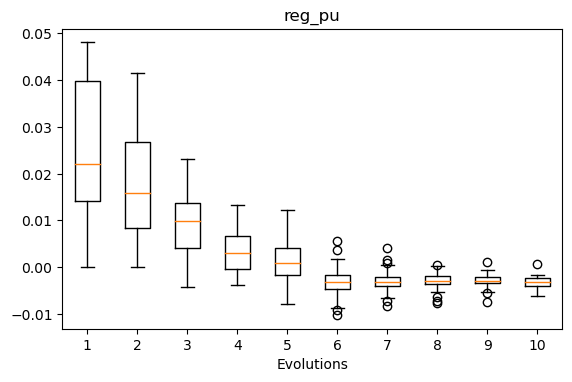

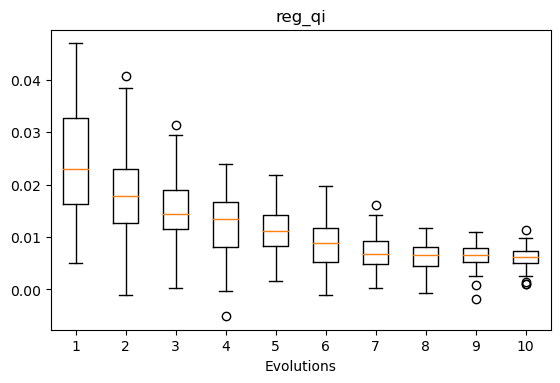

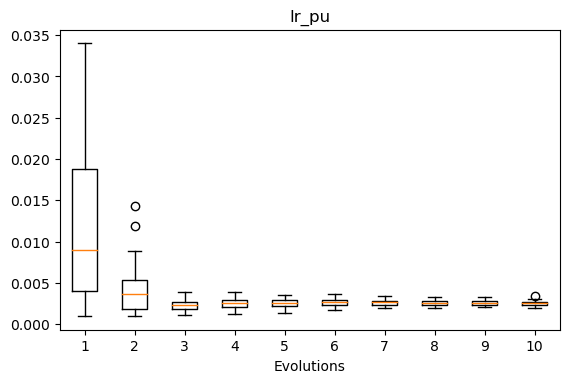

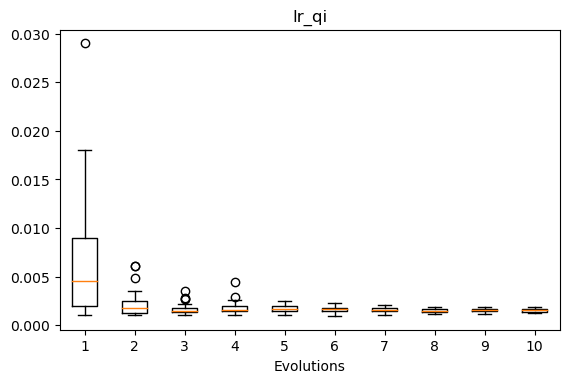

In [12]:
evo_regpq.plot_errors()
evo_regpq.plot_param("reg_pu")
evo_regpq.plot_param("reg_qi")
evo_regpq.plot_param("lr_pu")
evo_regpq.plot_param("lr_qi")

In [13]:
# Regularization on yj
from evolution import Evolution

import numpy as np
from surprise import SVDpp

param_grid = {
    "n_factors": [1],
    "cache_ratings": [True],
    "n_epochs": [577],
    "reg_bu": [0.00599],
    "reg_bi": [-0.00036],
    "lr_bu": [0.00006],
    "lr_bi": [0.02749],
    "reg_pu": [0.00001],
    "reg_qi": [0.00391],
    "lr_pu": [0.00356],
    "lr_qi": [0.0016],
    "lr_yj": np.arange(0, 0.05, 0.001),
    "reg_yj": np.arange(0, 0.05, 0.001),
}
const_params = {
    "cache_ratings": [True],
    "n_epochs": [577],
    "n_factors": [1],
    "reg_bu": [0.00599],
    "reg_bi": [-0.00036],
    "lr_bu": [0.00006],
    "lr_bi": [0.02749],
    "reg_pu": [0.00001],
    "reg_qi": [0.00391],
    "lr_pu": [0.00356],
    "lr_qi": [0.0016],
}
int_params = []

evo_regpq = Evolution(
    SVDpp,
    param_grid,
    int_dist=int_params,
    const_params=const_params,
    model_suffix="_(yj)",
)

# evo9 public score: 0.64721
evo_regpq.evolve(data, 10, 0.1, 500, 4)

RUNNING EVOLUTION 0
model_name='SVDpp_evo(1)_(yj)'


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  4.8min finished


Train rmse: 0.6661684519614636
RUNNING EVOLUTION 1
model_name='SVDpp_evo(2)_(yj)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6642925370326402
RUNNING EVOLUTION 2
model_name='SVDpp_evo(3)_(yj)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6670415587222223
RUNNING EVOLUTION 3
model_name='SVDpp_evo(4)_(yj)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6695775056404741
RUNNING EVOLUTION 4
model_name='SVDpp_evo(5)_(yj)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6694155060893481
RUNNING EVOLUTION 5
model_name='SVDpp_evo(6)_(yj)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6701895035287421
RUNNING EVOLUTION 6
model_name='SVDpp_evo(7)_(yj)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6658214546609565
RUNNING EVOLUTION 7
model_name='SVDpp_evo(8)_(yj)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6715148264312516
RUNNING EVOLUTION 8
model_name='SVDpp_evo(9)_(yj)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6616284129857234
RUNNING EVOLUTION 9
model_name='SVDpp_evo(10)_(yj)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6677828203470091


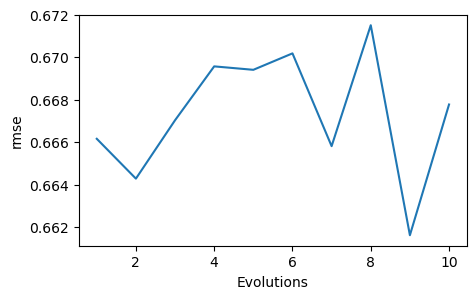

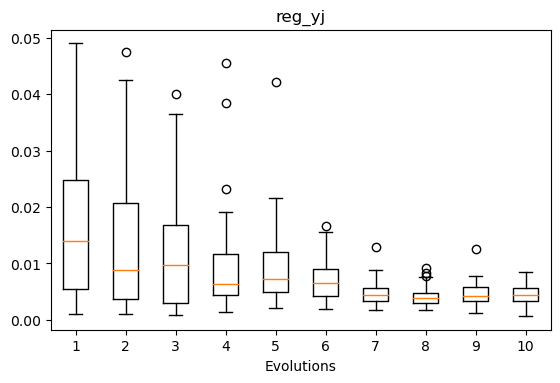

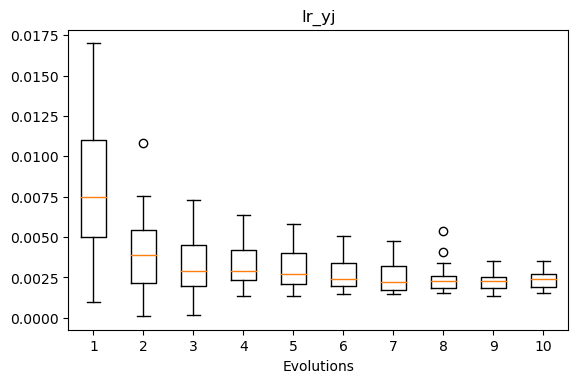

In [14]:
evo_regpq.plot_errors()
evo_regpq.plot_param("reg_yj")
evo_regpq.plot_param("lr_yj")

In [16]:
# Find best epochs
from evolution import Evolution

import numpy as np
from surprise.model_selection import GridSearchCV

param_grid = {
    "n_factors": [1],
    "cache_ratings": [True],
    "n_epochs": np.arange(1, 2001),
    "reg_bu": [0.00599],
    "reg_bi": [-0.00036],
    "lr_bu": [0.00006],
    "lr_bi": [0.02749],
    "reg_pu": [0.00001],
    "reg_qi": [0.00391],
    "lr_pu": [0.00356],
    "lr_qi": [0.0016],
    "lr_yj": [0.00236],
    "reg_yj": [0.00542],
}

gs = GridSearchCV(
    SVDpp, param_grid, measures=["rmse"], cv=4, n_jobs=-1, joblib_verbose=10
)
gs.fit(data)
print(f"rmse={gs.best_score['rmse']}")
print(f"Best epochs={gs.best_params['rmse']['n_epochs']}")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  

In [17]:
print(f"rmse={gs.best_score['rmse']}")
print(f"Best epochs={gs.best_params['rmse']['n_epochs']}")

rmse=0.6622305970113194
Best epochs=531


In [18]:
from surprise.model_selection import RandomizedSearchCV
import scipy.stats as st

param_grid = {
    "n_factors": [1],
    "cache_ratings": [True],
    "n_epochs": [gs.best_params["rmse"]["n_epochs"]],
    "reg_bu": st.norm(0.00599, 0.0025),
    "reg_bi": st.norm(-0.00036, 0.0001),
    "lr_bu": st.norm(0.00006, 0.000025),
    "lr_bi": st.norm(0.02749, 0.0075),
    "reg_pu": st.norm(0.00001, 0.0000075),
    "reg_qi": st.norm(0.00391, 0.001),
    "lr_pu": st.norm(0.00356, 0.001),
    "lr_qi": st.norm(0.0016, 0.00075),
    "lr_yj": st.norm(0.00236, 0.00075),
    "reg_yj": st.norm(0.00542, 0.0025),
}

rs = RandomizedSearchCV(
    SVDpp, param_grid, n_iter=1000, cv=4, n_jobs=-1, joblib_verbose=10
)

In [19]:
rs.fit(data)
print(f"rmse={rs.best_score['rmse']}")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  

rmse=0.6622756658637153
Best epochs=531


[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:  9.0min finished


In [21]:
print(f"Best epochs={rs.best_params['rmse']}")

Best epochs={'cache_ratings': True, 'lr_bi': 0.022103729193167332, 'lr_bu': 5.964210634776729e-05, 'lr_pu': 0.0024279870152229197, 'lr_qi': 0.0015257756139312275, 'lr_yj': 0.0025538838921406533, 'n_epochs': 531, 'n_factors': 1, 'reg_bi': -0.00027143677945660625, 'reg_bu': 0.0015210497941112663, 'reg_pu': 1.7668113905419636e-05, 'reg_qi': 0.0030026717984680497, 'reg_yj': 0.0014833009888479895}


In [23]:
param_grid = {
    "cache_ratings": [True],
    "n_epochs": [531],
    "n_factors": [1],
    "lr_bi": st.norm(0.022103729193167332, 0.002),
    "lr_bu": st.norm(5.964210634776729e-05, 5e-6),
    "lr_pu": [0.0024279870152229197],
    "lr_qi": [0.0015257756139312275],
    "lr_yj": [0.0025538838921406533],
    "reg_bi": st.norm(-0.00027143677945660625, 0.00002),
    "reg_bu": st.norm(0.0015210497941112663, 0.0001),
    "reg_pu": [1.7668113905419636e-05],
    "reg_qi": [0.0030026717984680497],
    "reg_yj": [0.0014833009888479895],
}

const_params = {
    "cache_ratings": [True],
    "n_epochs": [531],
    "n_factors": [1],
    "lr_pu": [0.0024279870152229197],
    "lr_qi": [0.0015257756139312275],
    "lr_yj": [0.0025538838921406533],
    "reg_pu": [1.7668113905419636e-05],
    "reg_qi": [0.0030026717984680497],
    "reg_yj": [0.0014833009888479895],
}
int_params = []

evo_regb2 = Evolution(
    SVDpp,
    param_grid,
    int_dist=int_params,
    const_params=const_params,
    model_suffix="_(b2)",
)

# evo9 public score:
evo_regb2.evolve(data, 10, 0.1, 500, 4)

RUNNING EVOLUTION 0
model_name='SVDpp_evo(1)_(b2)'


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
43866.10s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
43866.10s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
43866.10s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
43866.11s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
43866.12s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
43866.12s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
43866.13s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
43866.14s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
43866.14s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
43866.15s - pydevd: Sending message related to process bein

Train rmse: 0.6643663114064641
RUNNING EVOLUTION 1
model_name='SVDpp_evo(2)_(b2)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6657160775664073
RUNNING EVOLUTION 2
model_name='SVDpp_evo(3)_(b2)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.666407135517967
RUNNING EVOLUTION 3
model_name='SVDpp_evo(4)_(b2)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6707818810433825
RUNNING EVOLUTION 4
model_name='SVDpp_evo(5)_(b2)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6699562288484338
RUNNING EVOLUTION 5
model_name='SVDpp_evo(6)_(b2)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6650466872661591
RUNNING EVOLUTION 6
model_name='SVDpp_evo(7)_(b2)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6730983331707596
RUNNING EVOLUTION 7
model_name='SVDpp_evo(8)_(b2)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6677379891892458
RUNNING EVOLUTION 8
model_name='SVDpp_evo(9)_(b2)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6603952038060585
RUNNING EVOLUTION 9
model_name='SVDpp_evo(10)_(b2)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6650583903299061


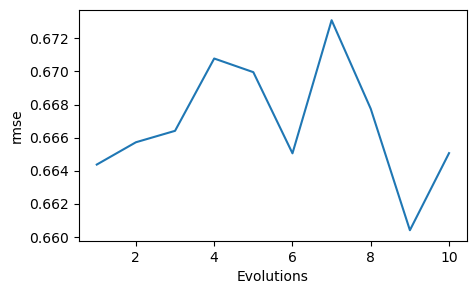

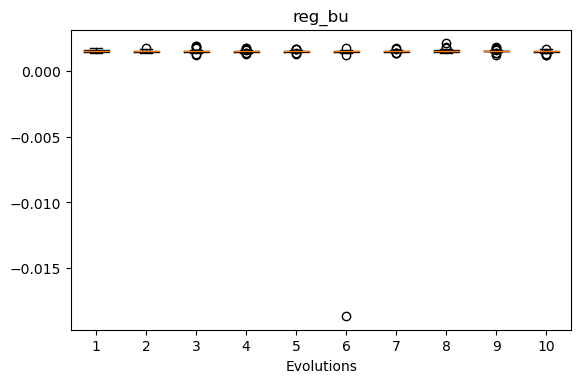

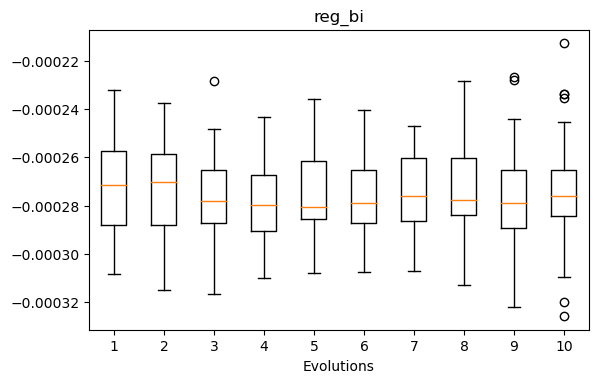

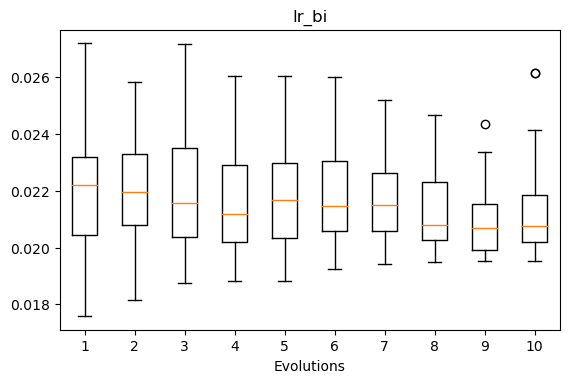

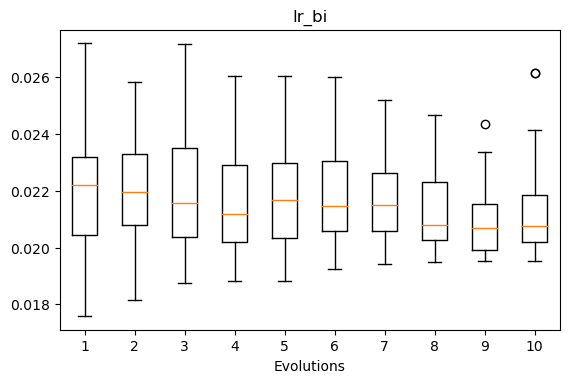

In [25]:
evo_regb2.plot_errors()
evo_regb2.plot_param("reg_bu")
evo_regb2.plot_param("reg_bi")
evo_regb2.plot_param("lr_bi")
evo_regb2.plot_param("lr_bi")

In [26]:
# reg pq 2
param_grid = {
    "cache_ratings": [True],
    "n_epochs": [531],
    "n_factors": [1],
    "lr_bi": [0.01954],
    "lr_bu": [0.00006],
    "lr_pu": st.norm(0.0024279870152229197, 0.0008),
    "lr_qi": st.norm(0.0015257756139312275, 0.0005),
    "lr_yj": [0.0025538838921406533],
    "reg_bi": [-0.00027],
    "reg_bu": [0.00138],
    "reg_pu": st.norm(1.7668113905419636e-05, 5e-6),
    "reg_qi": st.norm(0.0030026717984680497, 0.001),
    "reg_yj": [0.0014833009888479895],
}

const_params = {
    "cache_ratings": [True],
    "n_epochs": [531],
    "n_factors": [1],
    "lr_bi": [0.01954],
    "lr_bu": [0.00006],
    "lr_yj": [0.0025538838921406533],
    "reg_bi": [-0.00027],
    "reg_bu": [0.00138],
    "reg_yj": [0.0014833009888479895],
}
int_params = []

evo_repq2 = Evolution(
    SVDpp,
    param_grid,
    int_dist=int_params,
    const_params=const_params,
    model_suffix="_(pq2)",
)

# evo2 public score: 0.64647 -> Best
evo_repq2.evolve(data, 10, 0.1, 500, 4)

RUNNING EVOLUTION 0
model_name='SVDpp_evo(1)_(pq2)'


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
54456.78s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
54456.78s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
54456.78s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
54456.78s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
54456.81s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
54456.84s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
54456.86s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
54456.87s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
54456.87s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
54456.88s - pydevd: Sending message related to process bein

Train rmse: 0.6633394120856163
RUNNING EVOLUTION 1
model_name='SVDpp_evo(2)_(pq2)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.658598440907747
RUNNING EVOLUTION 2
model_name='SVDpp_evo(3)_(pq2)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6735980207456382
RUNNING EVOLUTION 3
model_name='SVDpp_evo(4)_(pq2)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6682962201678633
RUNNING EVOLUTION 4
model_name='SVDpp_evo(5)_(pq2)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6715000865345764
RUNNING EVOLUTION 5
model_name='SVDpp_evo(6)_(pq2)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6647395153570356
RUNNING EVOLUTION 6
model_name='SVDpp_evo(7)_(pq2)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6645317705426198
RUNNING EVOLUTION 7
model_name='SVDpp_evo(8)_(pq2)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6686219739419537
RUNNING EVOLUTION 8
model_name='SVDpp_evo(9)_(pq2)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6680498852105722
RUNNING EVOLUTION 9
model_name='SVDpp_evo(10)_(pq2)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6676496979059477


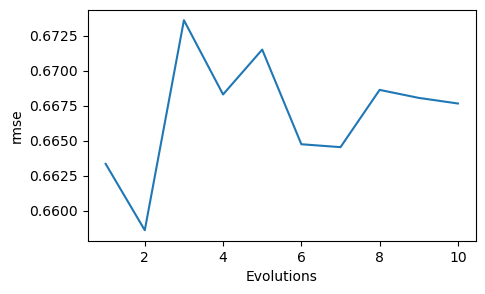

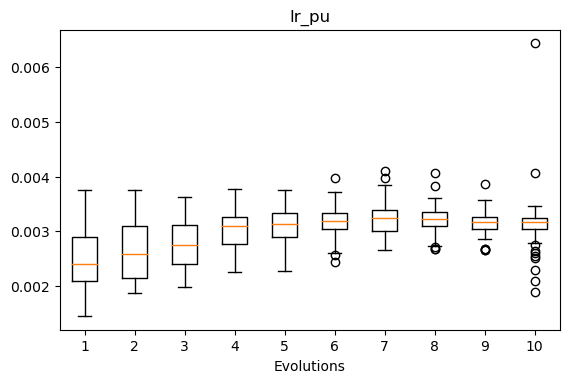

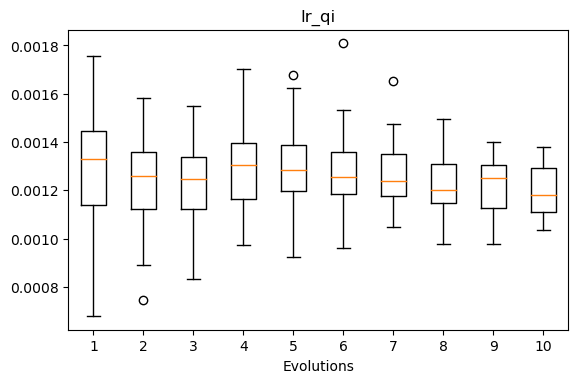

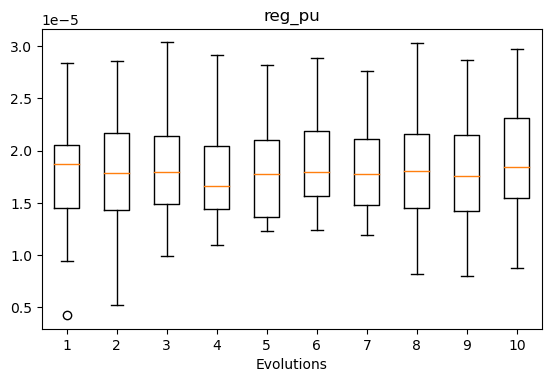

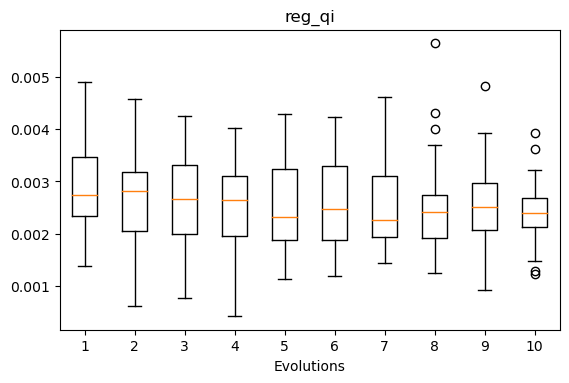

In [27]:
evo_repq2.plot_errors()
evo_repq2.plot_param("lr_pu")
evo_repq2.plot_param("lr_qi")
evo_repq2.plot_param("reg_pu")
evo_repq2.plot_param("reg_qi")

In [28]:
# reg yj 2
param_grid = {
    "cache_ratings": [True],
    "n_epochs": [531],
    "n_factors": [1],
    "lr_bi": [0.01954],
    "lr_bu": [0.00006],
    "lr_pu": [0.00309],
    "lr_qi": [0.00092],
    "lr_yj": st.norm(0.0025538838921406533, 0.0008),
    "reg_bi": [-0.00027],
    "reg_bu": [0.00138],
    "reg_pu": [0.00002],
    "reg_qi": [0.00293],
    "reg_yj": st.norm(0.0014833009888479895, 0.0005),
}

const_params = {
    "cache_ratings": [True],
    "n_epochs": [531],
    "n_factors": [1],
    "lr_bi": [0.01954],
    "lr_bu": [0.00006],
    "lr_pu": [0.00309],
    "lr_qi": [0.00092],
    "reg_bi": [-0.00027],
    "reg_bu": [0.00138],
    "reg_pu": [0.00002],
    "reg_qi": [0.00293],
}
int_params = []

evo_regy2 = Evolution(
    SVDpp,
    param_grid,
    int_dist=int_params,
    const_params=const_params,
    model_suffix="_(y2)",
)

#
evo_regy2.evolve(data, 10, 0.1, 500, 4)

RUNNING EVOLUTION 0
model_name='SVDpp_evo(1)_(y2)'


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
62719.24s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
62719.23s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
62719.23s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
62719.24s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
62719.24s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
62719.24s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
62719.24s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
62719.24s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
62719.25s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
62719.26s - pydevd: Sending message related to process bein

Train rmse: 0.6651186676676707
RUNNING EVOLUTION 1
model_name='SVDpp_evo(2)_(y2)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6664528572970893
RUNNING EVOLUTION 2
model_name='SVDpp_evo(3)_(y2)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6675332191795168
RUNNING EVOLUTION 3
model_name='SVDpp_evo(4)_(y2)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6670564332497164
RUNNING EVOLUTION 4
model_name='SVDpp_evo(5)_(y2)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6641821936778683
RUNNING EVOLUTION 5
model_name='SVDpp_evo(6)_(y2)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6677324928562632
RUNNING EVOLUTION 6
model_name='SVDpp_evo(7)_(y2)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6638876872843329
RUNNING EVOLUTION 7
model_name='SVDpp_evo(8)_(y2)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.67051942645115
RUNNING EVOLUTION 8
model_name='SVDpp_evo(9)_(y2)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6650818097910101
RUNNING EVOLUTION 9
model_name='SVDpp_evo(10)_(y2)'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6652679718697447


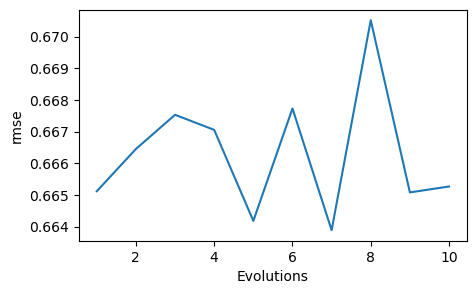

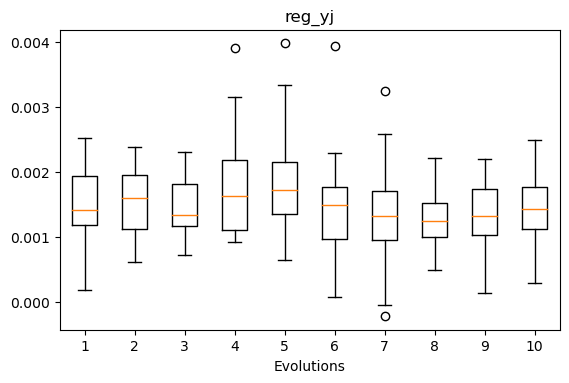

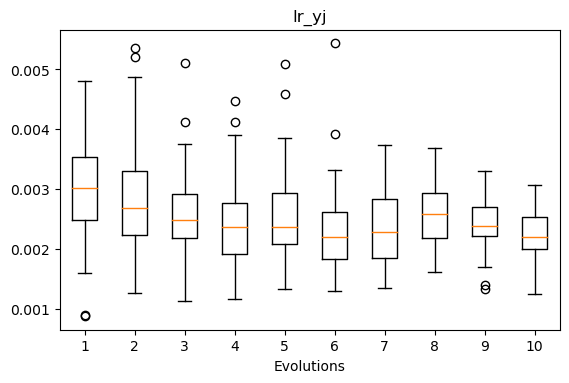

In [29]:
evo_regy2.plot_errors()
evo_regy2.plot_param("reg_yj")
evo_regy2.plot_param("lr_yj")

In [73]:
# reg epochs
param_grid = {
    "cache_ratings": [True],
    "n_epochs": np.arange(1, 2000),
    "n_factors": [1],
    "lr_bi": [0.01954],
    "lr_bu": [0.00006],
    "lr_pu": [0.00309],
    "lr_qi": [0.00092],
    "lr_yj": [0.00281791],
    "reg_bi": [-0.00027],
    "reg_bu": [0.00138],
    "reg_pu": [0.00002],
    "reg_qi": [0.00293],
    "reg_yj": [0.00016986],
}

gs_epoch2 = RandomizedSearchCV(SVDpp, param_grid, measures=["rmse"], cv=4, n_jobs=-1)
gs_epoch2.fit(data)
print(f"rmse={gs_epoch2.best_score['rmse']}")
print(f"best_epoch={gs_epoch2.best_params['rmse']['n_epochs']}")

74022.37s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
74022.37s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
74022.39s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
74022.39s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
74022.40s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
74022.42s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
74022.43s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
74022.44s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
74022.45s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
74022.46s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
74022.47s - pydevd: Sending message rela

rmse=0.6656142677795416
best_epoch=914


In [77]:
# reg epochs
param_grid = {
    "cache_ratings": [True],
    "n_epochs": [914],
    "n_factors": [1],
    "lr_bi": st.norm(0.01954, 0.006),
    "lr_bu": st.norm(0.00006, 0.00002),
    "lr_pu": st.norm(0.00309, 0.001),
    "lr_qi": st.norm(0.00092, 0.0003),
    "lr_yj": st.norm(0.00281791, 0.001),
    "reg_bi": [-0.00027],
    "reg_bu": [0.00138],
    "reg_pu": [0.00002],
    "reg_qi": [0.00293],
    "reg_yj": [0.00016986],
}

const_params = {
    "cache_ratings": [True],
    "n_epochs": [914],
    "n_factors": [1],
    "reg_bi": [-0.00027],
    "reg_bu": [0.00138],
    "reg_pu": [0.00002],
    "reg_qi": [0.00293],
    "reg_yj": [0.00016986],
}
int_params = []

evo_lr = Evolution(
    SVDpp,
    param_grid,
    int_dist=int_params,
    const_params=const_params,
    model_suffix="_lr-cv5",
)

# evo9 public score: 0.64771
evo_lr.evolve(data, 10, 0.1, 500, 5)

RUNNING EVOLUTION 0
model_name='SVDpp_evo(1)_lr-cv5'


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
75618.26s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
75618.26s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
75618.27s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
75618.28s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
75618.29s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
75618.29s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
75618.30s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
75618.30s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
75618.31s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
75618.32s - pydevd: Sending message related to process bein

Train rmse: 0.6622347279754195
RUNNING EVOLUTION 1
model_name='SVDpp_evo(2)_lr-cv5'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.658479429315968
RUNNING EVOLUTION 2
model_name='SVDpp_evo(3)_lr-cv5'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6621958248468841
RUNNING EVOLUTION 3
model_name='SVDpp_evo(4)_lr-cv5'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6629871136179197
RUNNING EVOLUTION 4
model_name='SVDpp_evo(5)_lr-cv5'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6553102042130352
RUNNING EVOLUTION 5
model_name='SVDpp_evo(6)_lr-cv5'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6620899433741746
RUNNING EVOLUTION 6
model_name='SVDpp_evo(7)_lr-cv5'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6597130236530837
RUNNING EVOLUTION 7
model_name='SVDpp_evo(8)_lr-cv5'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6578997567532708
RUNNING EVOLUTION 8
model_name='SVDpp_evo(9)_lr-cv5'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6552926746077258
RUNNING EVOLUTION 9
model_name='SVDpp_evo(10)_lr-cv5'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6621864019762297


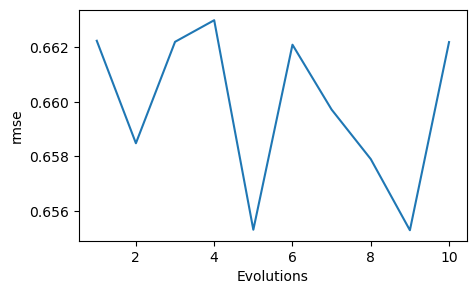

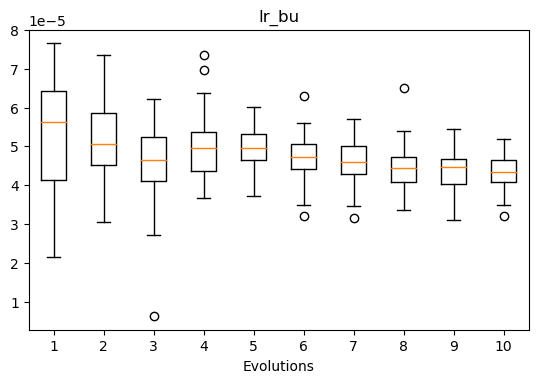

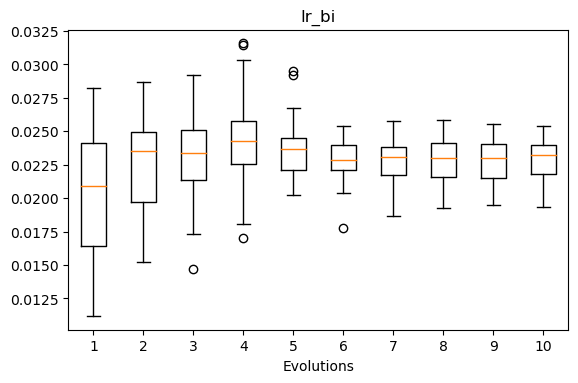

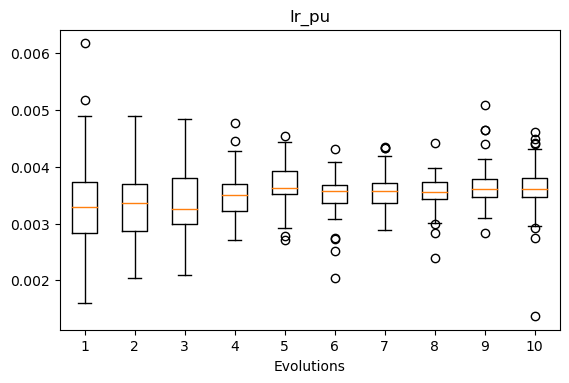

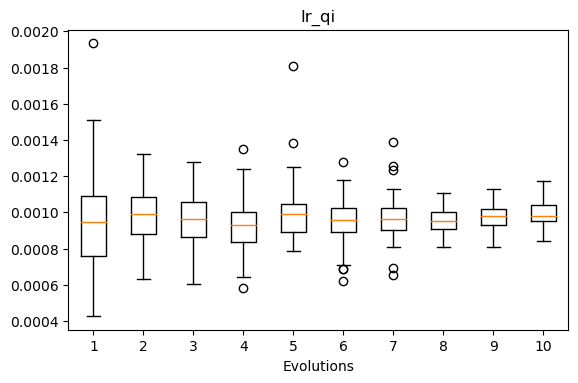

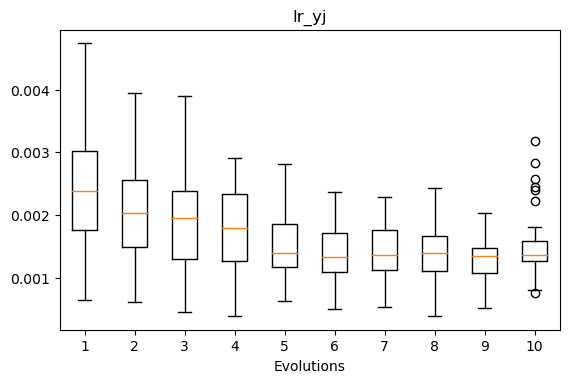

In [78]:
evo_lr.plot_errors()
evo_lr.plot_param("lr_bu")
evo_lr.plot_param("lr_bi")
evo_lr.plot_param("lr_pu")
evo_lr.plot_param("lr_qi")
evo_lr.plot_param("lr_yj")

In [80]:
# reg epochs
param_grid = {
    "cache_ratings": [True],
    "n_epochs": [914],
    "n_factors": [1],
    "lr_bi": st.norm(0.01954, 0.006),
    "lr_bu": st.norm(0.00006, 0.00002),
    "lr_pu": st.norm(0.00309, 0.001),
    "lr_qi": st.norm(0.00092, 0.0003),
    "lr_yj": st.norm(0.00281791, 0.001),
    "reg_bi": [-0.00027],
    "reg_bu": [0.00138],
    "reg_pu": [0.00002],
    "reg_qi": [0.00293],
    "reg_yj": [0.00016986],
}

const_params = {
    "cache_ratings": [True],
    "n_epochs": [914],
    "n_factors": [1],
    "reg_bi": [-0.00027],
    "reg_bu": [0.00138],
    "reg_pu": [0.00002],
    "reg_qi": [0.00293],
    "reg_yj": [0.00016986],
}
int_params = []

evo_lr = Evolution(
    SVDpp,
    param_grid,
    int_dist=int_params,
    const_params=const_params,
    model_suffix="_lr-cv3",
)

# evo3 public score: 0.64729
evo_lr.evolve(data, 10, 0.1, 500, 3)

RUNNING EVOLUTION 0
model_name='SVDpp_evo(1)_lr-cv3'


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
85324.05s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
85324.05s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
85324.06s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
85324.07s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
85324.08s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
85324.08s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
85324.09s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
85324.10s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
85324.10s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
85324.11s - pydevd: Sending message related to process bein

Train rmse: 0.6813601935074921
RUNNING EVOLUTION 1
model_name='SVDpp_evo(2)_lr-cv3'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6812425151621854
RUNNING EVOLUTION 2
model_name='SVDpp_evo(3)_lr-cv3'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6754109540696529
RUNNING EVOLUTION 3
model_name='SVDpp_evo(4)_lr-cv3'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6754245724818483
RUNNING EVOLUTION 4
model_name='SVDpp_evo(5)_lr-cv3'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6802245064028911
RUNNING EVOLUTION 5
model_name='SVDpp_evo(6)_lr-cv3'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.684321725753704
RUNNING EVOLUTION 6
model_name='SVDpp_evo(7)_lr-cv3'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6823065749226007
RUNNING EVOLUTION 7
model_name='SVDpp_evo(8)_lr-cv3'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6829208500427951
RUNNING EVOLUTION 8
model_name='SVDpp_evo(9)_lr-cv3'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6758721706740264
RUNNING EVOLUTION 9
model_name='SVDpp_evo(10)_lr-cv3'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6837619798714224


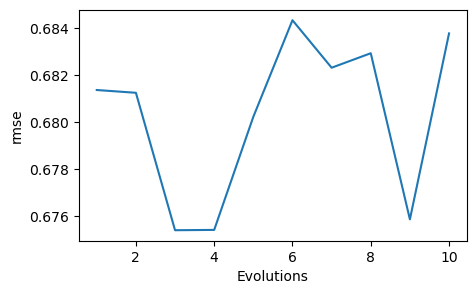

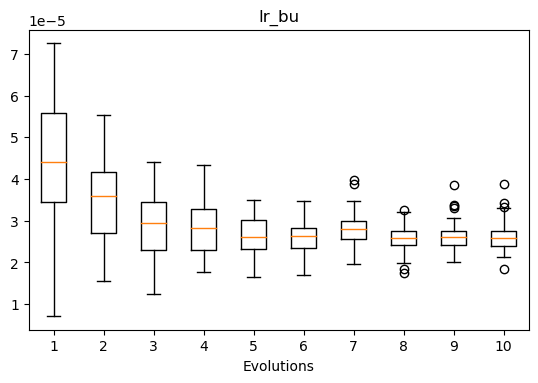

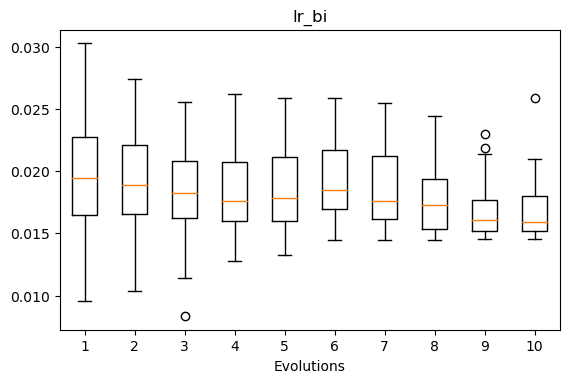

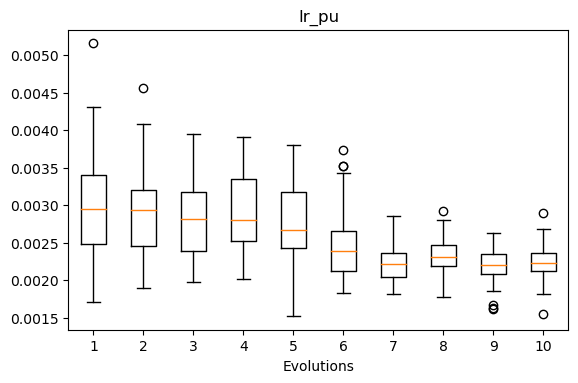

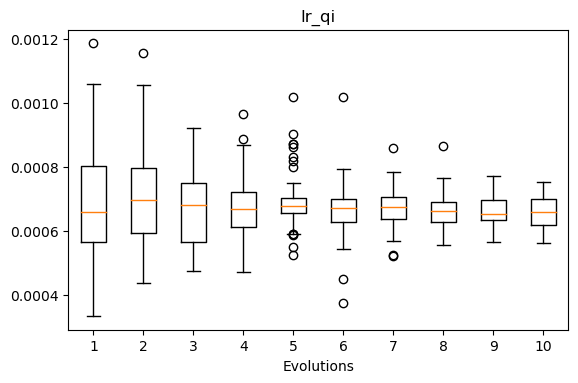

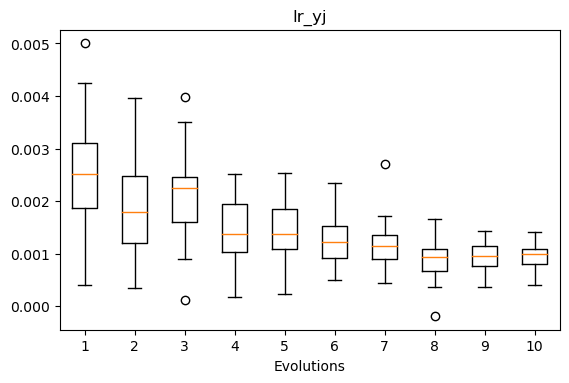

In [81]:
evo_lr.plot_errors()
evo_lr.plot_param("lr_bu")
evo_lr.plot_param("lr_bi")
evo_lr.plot_param("lr_pu")
evo_lr.plot_param("lr_qi")
evo_lr.plot_param("lr_yj")

In [82]:
# reg epochs
param_grid = {
    "cache_ratings": [True],
    "n_epochs": [914],
    "n_factors": [1],
    "lr_bi": [0.0083528],
    "lr_bu": [0.000025],
    "lr_pu": [0.00229248],
    "lr_qi": [0.00069888],
    "lr_yj": [0.00121347],
    "reg_bi": st.norm(-0.00027, 0.00009),
    "reg_bu": st.norm(0.00138, 0.0004),
    "reg_pu": st.norm(0.00002, 0.00001),
    "reg_qi": st.norm(0.00293, 0.001),
    "reg_yj": st.norm(0.00016986, 0.00005),
}

const_params = {
    "cache_ratings": [True],
    "n_epochs": [914],
    "n_factors": [1],
    "lr_bi": [0.0083528],
    "lr_bu": [0.000025],
    "lr_pu": [0.00229248],
    "lr_qi": [0.00069888],
    "lr_yj": [0.00121347],
}
int_params = []

evo_reg = Evolution(
    SVDpp,
    param_grid,
    int_dist=int_params,
    const_params=const_params,
    model_suffix="_reg-cv3",
)

#
evo_reg.evolve(data, 10, 0.1, 500, 3)

RUNNING EVOLUTION 0
model_name='SVDpp_evo(1)_reg-cv3'


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
94418.72s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
94418.72s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
94418.73s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
94418.73s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
94418.74s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
94418.75s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
94418.76s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
94418.77s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
94418.77s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
94418.78s - pydevd: Sending message related to process bein

Train rmse: 0.6889386209891676
RUNNING EVOLUTION 1
model_name='SVDpp_evo(2)_reg-cv3'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6738608764632391
RUNNING EVOLUTION 2
model_name='SVDpp_evo(3)_reg-cv3'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.681345456326178
RUNNING EVOLUTION 3
model_name='SVDpp_evo(4)_reg-cv3'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6690209063360483
RUNNING EVOLUTION 4
model_name='SVDpp_evo(5)_reg-cv3'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6810402836731102
RUNNING EVOLUTION 5
model_name='SVDpp_evo(6)_reg-cv3'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6852259460139454
RUNNING EVOLUTION 6
model_name='SVDpp_evo(7)_reg-cv3'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.677983589189008
RUNNING EVOLUTION 7
model_name='SVDpp_evo(8)_reg-cv3'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6760714714579931
RUNNING EVOLUTION 8
model_name='SVDpp_evo(9)_reg-cv3'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6789644390222737
RUNNING EVOLUTION 9
model_name='SVDpp_evo(10)_reg-cv3'


/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6932: RuntimeWarning: divide by zero encountered in scalar divide
  return ndata / np.sum(np.log((data - location) / scale))
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6955: RuntimeWarning: invalid value encountered in scalar subtract
  return dL_dLocation(shape, location) - dL_dScale(shape, scale)
/Users/borisleung/anaconda3/envs/stat3009/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      |

Train rmse: 0.6805058636433801
